In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

ds = load_dataset("Mike0307/MNIST-M")

import numpy as np

train_data = ds['train']
test_data = ds['test']

X_train = [np.array(image.resize((28, 28))) for image in train_data['image']]  # Resizing each image to (28, 28)
y_train = train_data['label']

X_test = [np.array(image.resize((28, 28))) for image in test_data['image']]  # Resizing each image to (28, 28)
y_test = test_data['label']

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)  
y_test = np.array(y_test)    

print('The current size of our dataset is : \nX_train -> ',X_train.shape,'\ny_train -> ' , y_train.shape, 
      '\nX_test -> ' , X_test.shape,'\ny_test' , y_test.shape )

C:\Users\anshb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The current size of our dataset is : 
X_train ->  (59001, 28, 28, 3) 
y_train ->  (59001,) 
X_test ->  (9001, 28, 28, 3) 
y_test (9001,)


In [2]:
X_train = X_train.reshape(len(X_train),-1)
X_test = X_test.reshape(len(X_test),-1)


print('The current size of our dataset is : \nX_train -> '
      ,X_train.shape,'\ny_train -> ' , y_train.shape, '\nX_test -> ' 
      , X_test.shape,'\ny_test' , y_test.shape )


# now we normalize our data
X_train = X_train/255
X_test = X_test/255

The current size of our dataset is : 
X_train ->  (59001, 2352) 
y_train ->  (59001,) 
X_test ->  (9001, 2352) 
y_test (9001,)


In [3]:
k = 3

def eucledean_dist(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

def most_voted(k_nearest):
    nearest = max((k_nearest),key = k_nearest.count)
    return nearest

def knn(X_train,X_test,y_train,k):
    y_pred = []

    for test_samples in X_test:
        distances = []
        for train_samples in X_train:
            dist = eucledean_dist(test_samples,train_samples)
            distances.append(dist)
        # now we take the indices of the nearest k values after they are sorted
        indices = np.argsort(distances)[:k] 
        
        k_nearest = [y_train[i] for i in indices] 
        nearest = most_voted(k_nearest)
        y_pred.append(nearest)

    return np.array(y_pred)


In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # i am making it very low beacuse it was taking a lot a time over 50 min
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print(f"After PCA: X_train_pca -> {X_train.shape}, X_test_pca -> {X_test.shape}")
y_pred = knn(X_train,X_test,y_train,k=5)

After PCA: X_train_pca -> (59001, 2), X_test_pca -> (9001, 2)


In [5]:
accuracy = np.sum(y_pred == y_test)/ len(y_test)
# i am printing less labels for better view
print(f"Predicted labels: {y_pred[:50]}")
print(f"Actual labels:    {y_test[:50]}")
print(f"Accuracy: {accuracy * 100:.2f}%")

Predicted labels: [1 5 3 7 4 6 4 9 1 9 2 3 9 4 2 3 3 1 4 9 8 2 9 6 5 8 1 2 9 6 0 7 8 8 2 5 9
 1 2 0 2 1 4 9 0 3 0 7 6 2]
Actual labels:    [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy: 10.60%


In [13]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict=True)
    
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1 = report['weighted avg']['f1-score']

{'Model': knn.__class__.__name__,'Accuracy': accuracy,'Precision': precision, 'Recall': recall, 'F1-Score': f1 }

{'Model': 'function',
 'Accuracy': np.float64(0.10598822353071881),
 'Precision': 0.10582269624000995,
 'Recall': 0.10598822353071881,
 'F1-Score': 0.10586734994026169}

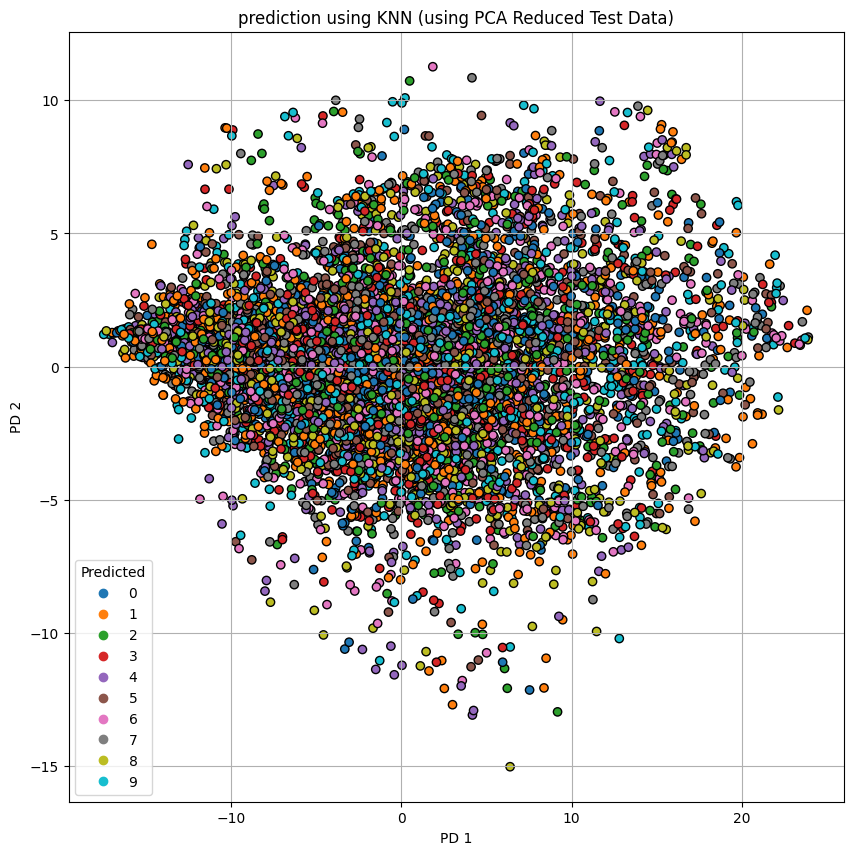

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='tab10', edgecolors='k')
plt.legend(*scatter.legend_elements(), title='Predicted')
plt.title("prediction using KNN (using PCA Reduced Test Data)")
plt.xlabel("PD 1")
plt.ylabel("PD 2")
plt.grid(True)
plt.show()

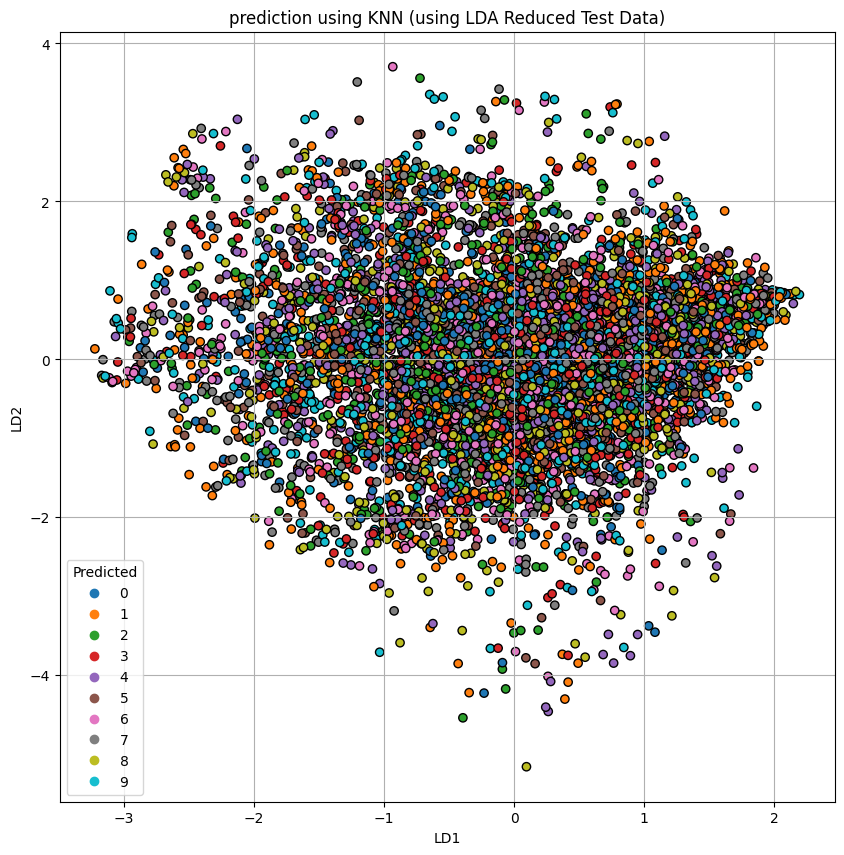

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_reduced = lda.fit_transform(X_test, y_test)

plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='tab10', edgecolor='k')
plt.legend(*scatter.legend_elements(), title="Predicted")
plt.title("prediction using KNN (using LDA Reduced Test Data)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.grid(True)
plt.show()


C:\Users\anshb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


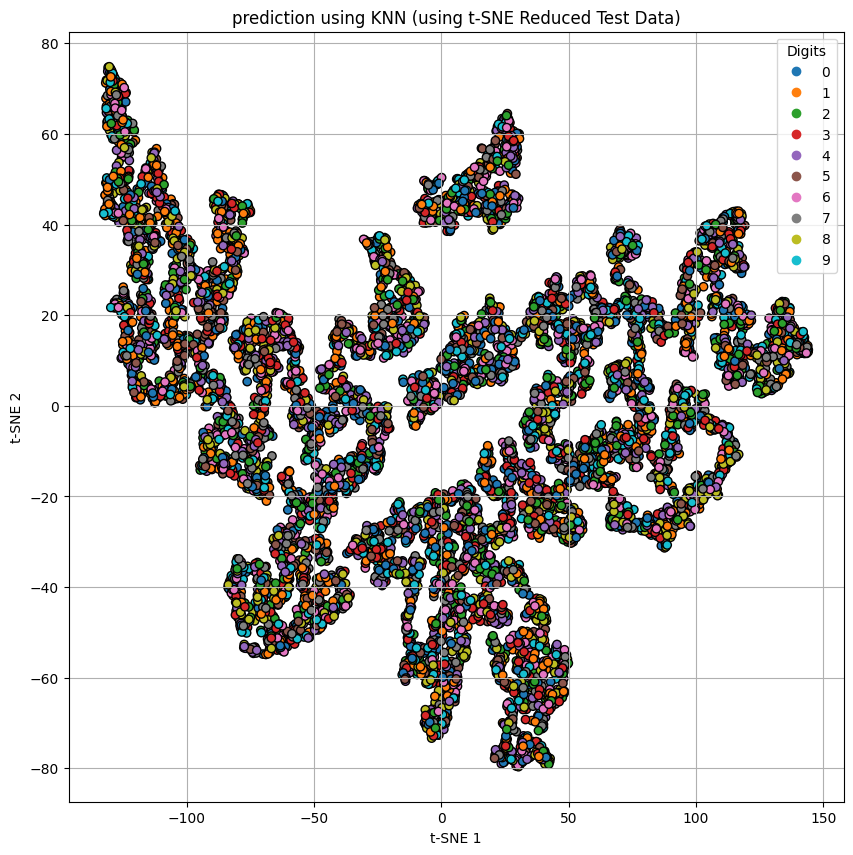

In [8]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=50,n_iter=5000,n_components=2,random_state=42)
X_tsne = tsne.fit_transform(X_test)

plt.figure(figsize=(10,10))
scatter = plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y_pred,cmap='tab10',edgecolors='k')
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title("prediction using KNN (using t-SNE Reduced Test Data)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.show()

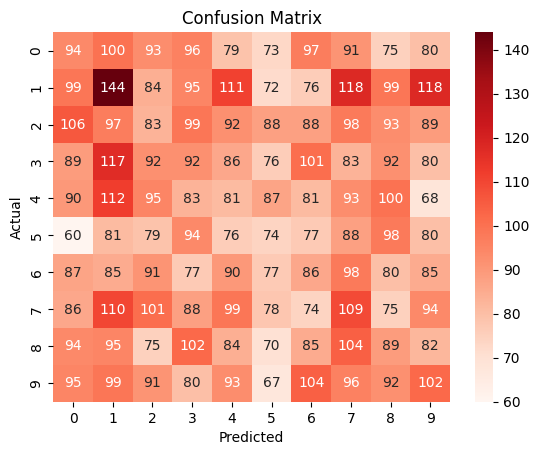

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

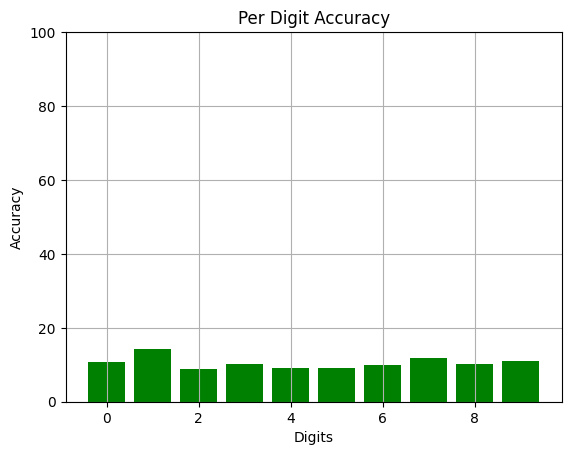

In [10]:
import numpy as np

accuracies = []
for digit in range(10):
    idx = (y_test == digit)
    correct = (y_pred[idx] == digit).sum()
    total = idx.sum()
    accuracies.append(correct / total * 100)

plt.bar(range(10), accuracies, color='green')
plt.xlabel("Digits")
plt.ylabel("Accuracy")
plt.title("Per Digit Accuracy")
plt.ylim(0, 100)
plt.grid(True)
plt.show()

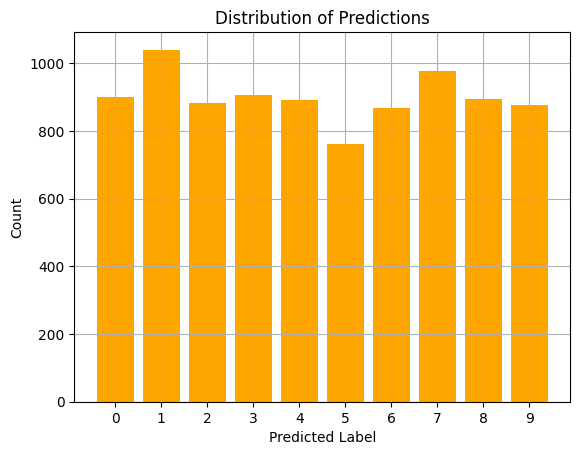

In [11]:
plt.hist(y_pred, bins=np.arange(11)-0.5, rwidth=0.8, color='orange')
plt.xticks(range(10))
plt.xlabel("Predicted Label")
plt.ylabel("Count")
plt.title("Distribution of Predictions")
plt.grid(True)
plt.show()